<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/UnsupervisedLearning_part_1_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook covers : 
1. K-means
2. KMEans ++
3. Accelerated KMeans
4. Mini-Batch Kmeans
5. ways to find no. of clusters
      * elbow
      * silhouette score
6. kMeans Limitations

# **K-Means**

* **Test datasets** are small contrived datasets that let you test a machine learning algorithm or test harness,The data from test datasets have well-defined properties, such as linearly or non-linearity, that allow you to explore specific algorithm behavior. The scikit-learn Python library provides a suite of functions for generating samples from configurable test problems for regression and classification.


* The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.. You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.



In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


In [6]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])  ##defining No. of Clusters , try to change them and check the figure below
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [7]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Now let's plot them:

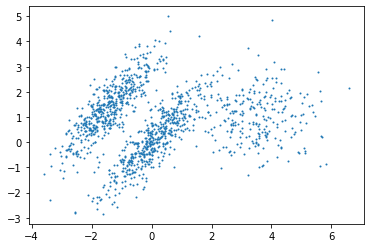

<Figure size 576x288 with 0 Axes>

In [67]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    # plt.xlabel("$x_1$", fontsize=14)
    # plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.figure(figsize=(8, 4))
plot_clusters(X)
# save_fig("blobs_diagram")
plt.show()

Let's train a K-Means clusterer on this dataset. 

In [2]:
from sklearn.cluster import KMeans

In [37]:
k=5
kmeans = KMeans(n_clusters= k , random_state=42)
y_pred = kmeans.fit_predict(X)

In [38]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [9]:
_cluster_centers = np.round(kmeans.cluster_centers_, decimals = 1)
_cluster_centers

array([[-2.8,  1.8],
       [ 0.2,  2.3],
       [-2.8,  2.8],
       [-1.5,  2.3],
       [-2.8,  1.3]])

In [10]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [11]:
y_pred is kmeans.labels_

True

In [12]:
kmeans.n_clusters

5

the algorithm runs multiple times with different random initializations
and keep the best solution. This is controlled by the **n_init** hyperparameter:
by default, it is equal to 10, which means that the whole algorithm described earlier


actually runs 10 times when you call fit(), and Scikit-Learn keeps the best solution.
But how exactly does it know which solution is the best? Well of course it uses a performance
metric!

 It is called the **model’s inertia**: this is the mean squared distance
between each instance and its closest centroid.


The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia:

In [13]:
kmeans.inertia_

211.5985372581684

The **score()** method returns the negative inertia. Why negative? Well, it is because a
predictor’s score() method must always respect the "great is better" rule.

In [39]:
kmeans.score(X)

-211.59853725816836

**Of course, we can predict the labels of new instances:**

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

**Decision Boundaries**

Let's plot the model's decision boundaries. This gives us a **Voronoi diagram**:

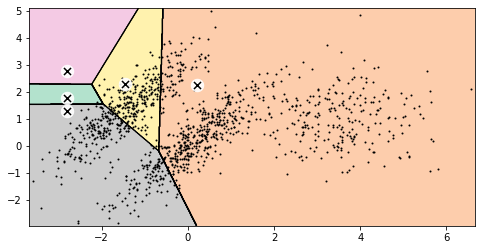

In [73]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        # plt.xlabel("$x_1$", fontsize=14)
        print()
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        # plt.ylabel("$x_2$", fontsize=14, rotation=0)
        print()
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
# save_fig("voronoi_diagram")
plt.show()

* Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

* Instead of assigning each instance to a single cluster, which is called **hard clustering**, it
can be useful to just give each instance a score per cluster: this is called **soft clustering**.
For example, the score can be the distance between the instance and the centroid, or
conversely it can be a similarity score (or affinity)

In [17]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In the KMeans class, the transform() method
measures the distance from each instance to every centroid

In [18]:
kmeans.transform(X_new)[0]

array([2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901])

the first instance in X_new is located at a distance of 2.81 from the
first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from
the fourth centroid and 2.87 from the fifth centroid.



You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [19]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)[0]

array([2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901])

**How K-Means Algorithm works ?**
The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:

1. First initialize  centroids randomly:  distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
2. Repeat until convergence (i.e., until the centroids stop moving):
3. Assign each instance to the closest centroid.
4. Update the centroids to be the mean of the instances that are assigned to them.

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.


Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [20]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

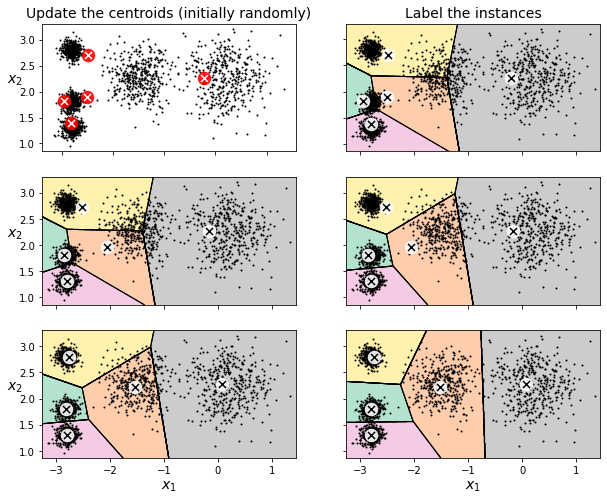

In [21]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

# save_fig("kmeans_algorithm_diagram")
plt.show()

**Centroid initialization**
In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions (local optimum), as you can see below:

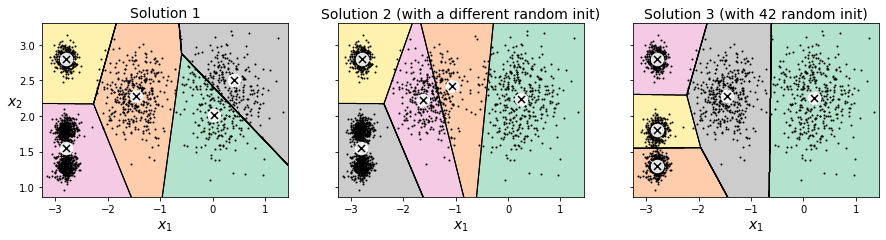

In [22]:
def plot_clusterer_comparison(clusterer1, clusterer2,clusterer3, X, title1=None, title2=None,  title3=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    clusterer3.fit(X)


    plt.figure(figsize=(15, 3.2))

    plt.subplot(131)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(132)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

    plt.subplot(133)
    plot_decision_boundaries(clusterer3, X, show_ylabels=False)
    if title3:
        plt.title(title3, fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

kmeans_rnd_init3 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=42)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2 , kmeans_rnd_init3, X,
                          "Solution 1", "Solution 2 (with a different random init)", "Solution 3 (with 42 random init)")

# save_fig("kmeans_variability_diagram")
plt.show()

In [23]:
print(kmeans_rnd_init1.inertia_)
print(kmeans_rnd_init2.inertia_)
print(kmeans_rnd_init3.inertia_)


223.2910857281903
237.462491694429
211.5985372581684


When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

In [24]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

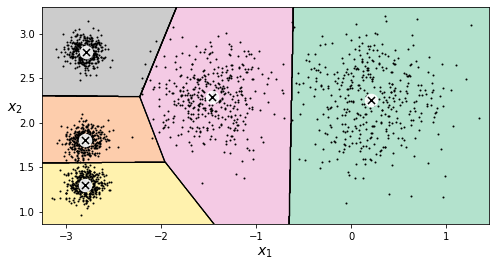

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Plot K-Means , cluster per inertia , cluster per training time

In [51]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))

for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)

    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(X)", number=10, globals=globals())   ######calucltae time for each iteration

    inertias[k-1, 0] = kmeans.inertia_

100/100

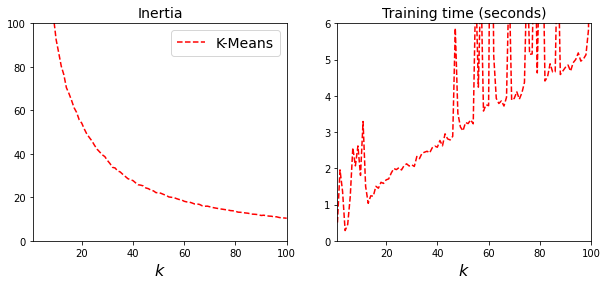

In [52]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Training time (seconds)", fontsize=14)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
#plt.legend(fontsize=14)

plt.show()

# **K-Means ++**

In [27]:
KMeans()

KMeans()

In [31]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

3.66 ms ± 434 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


211.5985372581684

# **Accelerated K-Means**

It is an in-built function in Python used to measure the time taken to execute a small bit of Python code

In [35]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X) ##Accelerated  - used by default

79.7 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [36]:
%timeit -n 50 KMeans(algorithm="full").fit(X) 


50.6 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


# Mini-Batch K-Means

In [37]:
from sklearn.cluster import MiniBatchKMeans
_MiniBatchKMeans = MiniBatchKMeans(n_clusters= 5, random_state=42)
_MiniBatchKMeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [38]:
_MiniBatchKMeans.inertia_

211.65239850433215

In [39]:
_MiniBatchKMeans.score

<bound method KMeans.score of MiniBatchKMeans(n_clusters=5, random_state=42)>

In [40]:
%timeit KMeans(n_clusters=5).fit(X)

41.2 ms ± 4.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)


The slowest run took 5.37 times longer than the fastest. This could mean that an intermediate result is being cached.
30.6 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


That's much faster! However, its performance is often lower (higher inertia), and it keeps degrading as k increases. Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means

In [74]:
from timeit import timeit

##Loop for culsters and interia
times = np.empty((100, 2))
inertias = np.empty((100, 2))

for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)

    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(X)", number=10, globals=globals())   ######calucltae time for each iteration
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())

    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

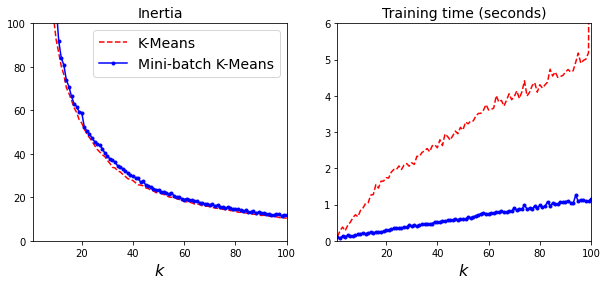

In [75]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Training time (seconds)", fontsize=14)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
#plt.legend(fontsize=14)

plt.show()

# **VIP - Finding the Optimal Number of Clusters**

### 1.  **ELBOW**

What if the number of clusters was set to a lower or greater value than 5?

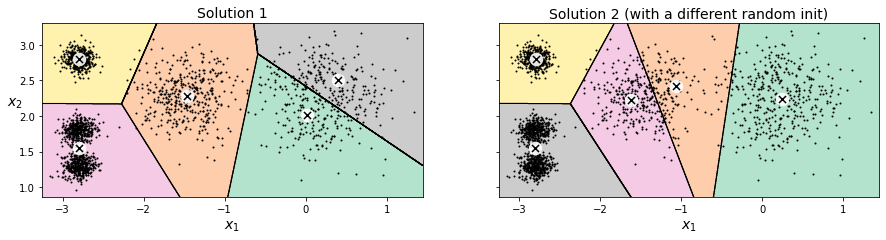

In [68]:
def plot_clusterer_comparison2(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)


    plt.figure(figsize=(15, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

   

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)



plot_clusterer_comparison2(kmeans_rnd_init1, kmeans_rnd_init2 , X,
                          "Solution 1", "Solution 2 (with a different random init)")

# save_fig("kmeans_variability_diagram")
# plt.show()

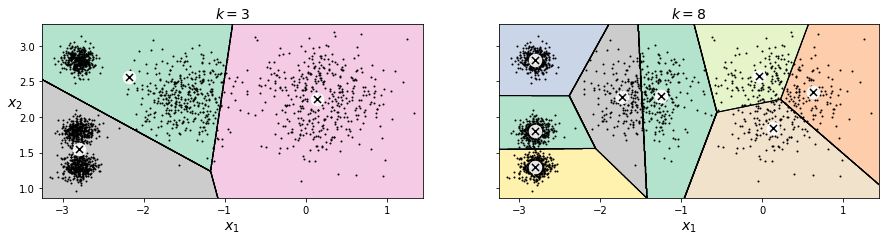

In [69]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison2(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
# save_fig("bad_n_clusters_diagram")
plt.show()

In [70]:
print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)


653.216719002155
119.11983416102879


However, we can plot the inertia as a function of  and analyze the resulting curve:

In [49]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

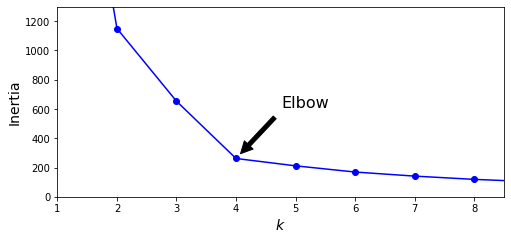

In [9]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
# save_fig("inertia_vs_k_diagram")
plt.show()

As you can see, there is an elbow at k=4 , which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So k=4 is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

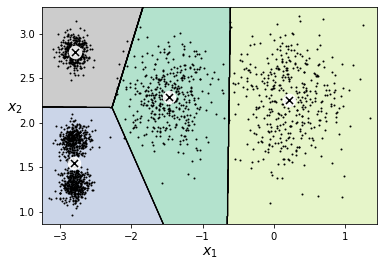

In [73]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

## 2. silhouette score

This technique for choosing the best value for the number of clusters is rather coarse.
A more precise approach (but also more computationally expensive) is to use the **silhouette score**, which is the mean silhouette coefficient over all the instances.

The silhouette coefficient can vary between -1 and +1:
*  a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,

* while a coefficient close to 0 means that it is close to a cluster boundary,

* and finally a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster.



In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [56]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [58]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]] ##skip k=1 
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6068660656395705,
 0.5600381725018386,
 0.5668839323465226]

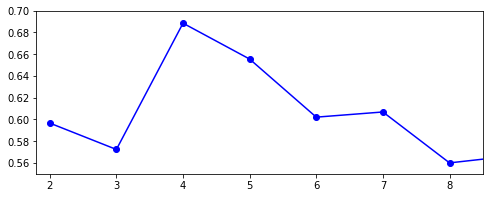

In [52]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_diagram")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that k=4 is a very good choice, but it also underlines the fact that k=5 is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

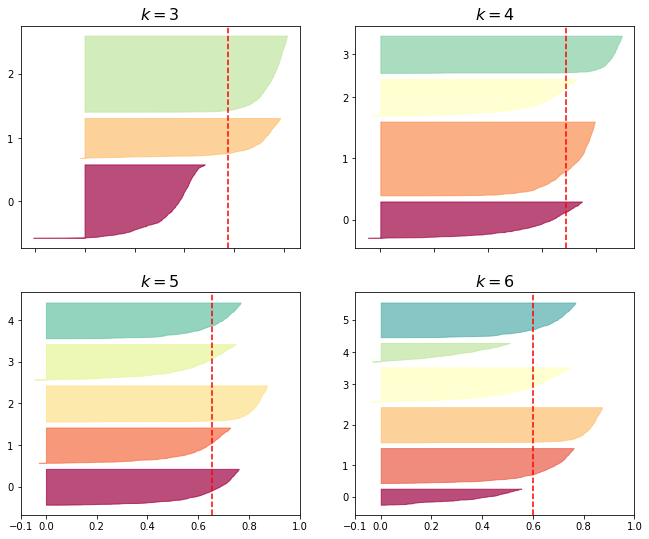

In [63]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        # plt.ylabel("Cluster")
        print('')
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        # plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_diagram")
plt.show()

The vertical dashed lines represent the silhouette score for each number of clusters.
When most of the instances in a cluster have a lower coefficient than this score (i.e., if
many of the instances stop short of the dashed line, ending to the left of it), then the
cluster is rather bad since this means its instances are much too close to other clus‐ters. We can see that when k=3 and when k=6, we get bad clusters. But when k=4 or
k=5, the clusters look pretty good – most instances extend beyond the dashed line, to
the right and closer to 1.0. **When k=4, the cluster at index 1 (the third from the top),
is rather big, while when k=5, all clusters have similar sizes, so even though the overall
silhouette score from k=4 is slightly greater than for k=5, it seems like a good idea
to use k=5 to get clusters of similar sizes**

# **Limits of K-Means**

Despite its many merits, most notably being fast and scalable, K-Means is not perfect.
As we saw, it is necessary to run the algorithm several times to avoid sub-optimal solutions,
plus you need to specify the number of clusters, which can be quite a hassle.
Moreover, K-Means does not behave very well when the clusters have varying sizes,
different densities, or non-spherical shapes. For example, Figure 9-11 shows how KMeans
clusters a dataset containing three ellipsoidal clusters of different dimensions,
densities and orientations:

In [64]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


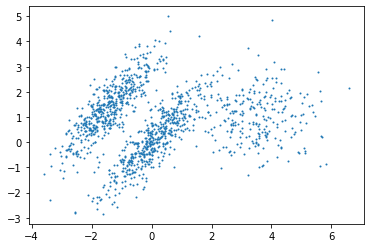

<Figure size 576x288 with 0 Axes>

In [68]:
plot_clusters(X)

In [69]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

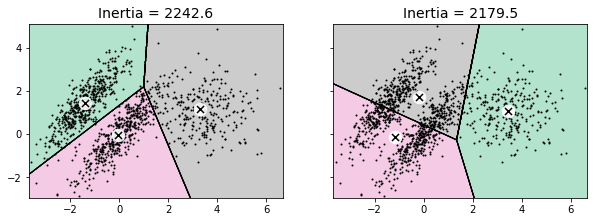

In [74]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

# save_fig("bad_kmeans_diagram")
plt.show()

As you can see, neither of these solutions are any good. The solution on the left is
better, but it still chops off 25% of the middle cluster and assigns it to the cluster on
the right. The solution on the right is just terrible, even though its inertia is lower. So
depending on the data, different clustering algorithms may perform better. For example,
on these types of elliptical clusters, Gaussian mixture models work great.

**It is important to scale the input features before you run K-Means,
or else the clusters may be very stretched, and K-Means will per
form
poorly. Scaling the features does not guarantee that all the
clusters will be nice and spherical, but it generally improves things.**